# Statistická analýza, příprava dat

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

Pro tento příklad budeme používat podmnožinu s tohoto souboru.
!!! Vytvořený subset nemusí statisticky odpovídat původnímu souboru

## Sub dataset
- Data  = struktura s vyplněnými daty
- m 	= počet řádků = 100
- x’s = vstupní proměnná / features
- y’s = výstupní promměná / target
- (x, y) = jeden řádek z training dataset
- x(2) = (4, 5, 3374, 85)
- y(2) = 1 050 000

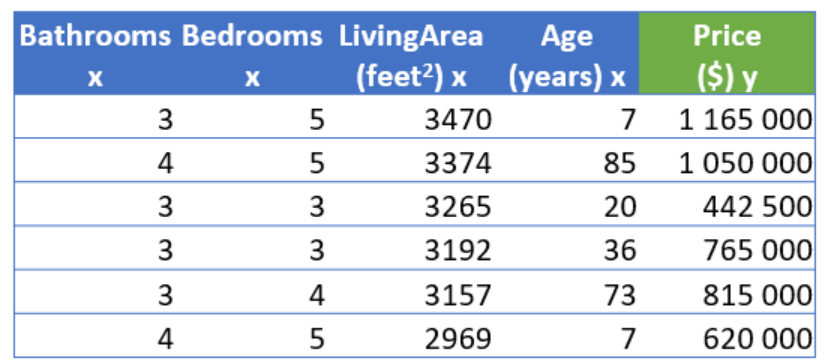

# Úkol
- Vytvořte regresní lineání model z parametrů, které jste vybrali minulé cvičení
- Data před zpracováním standardizujte
- Model vytvořte ručně
- Model vytvořte pomocí scikit-learn

# Načtení dat

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
data = pd.read_csv ("../dataset/portland_filtered.csv",  sep=';')

In [84]:
data=data.dropna()

# Lineání model bez pomocí knihoven
- Vytvořte si ručně model lineární regrese bez pomoci externích knihoven
- Vypište jeho parametry
- Vypiše jeho skóre pro trénovací a validační data
- Vykreslete graf historie učení
- Vizualizujte model

In [85]:
X = pd.DataFrame(np.c_[data['age']], columns = ['age'])
Y = data['price']

In [86]:
X.describe()

,age
count,100.00000
mean,49.88000
std,32.77973
min,3.00000
25%,20.00000
50%,47.50000
75%,75.25000
max,114.00000


In [87]:
Y.describe()

count    1.000000e+02
mean     5.196074e+05
std      1.722241e+05
min      1.650000e+05
25%      4.125000e+05
50%      5.000000e+05
75%      5.995312e+05
max      1.165000e+06
Name: price, dtype: float64

In [88]:
def split_dataset (X, Y, train_ratio = 0.75, validation_ratio = 0.15, test_ratio = 0.10):
    """ Slitting the dataset into training, validation and testing subset
        X - explanatory variables
        Y - explained variables

        train_ratio      - training data ratio
        validation_ratio - validation data ratio
        test_ratio       - ratio of test data

    """
    assert(train_ratio + validation_ratio + test_ratio == 1.0)

    # train nyní tvoří 75 % celého souboru dat
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 - train_ratio)

    # test je nyní 10 % původního souboru dat
    # nyní představuje 15 % původního souboru dat
    X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 
    return X_train, Y_train, X_val, Y_val, X_test, Y_test

In [89]:
# kontrola velikosti data subsets
X_train, Y_train, X_val, Y_val, X_test, Y_test = split_dataset(X, Y)
print (X_train.shape, Y_train.shape)
print (X_val.shape, Y_val.shape)
print (X_test.shape, Y_test.shape)

(75, 1) (75,)
(15, 1) (15,)
(10, 1) (10,)


In [90]:
def initialize(dim):
    bias=random.random()
    weights=np.random.rand(dim)
    return bias, weights

In [91]:
def print_model_params(bias, weights):
    print ("Model parameters\n================")
    print(f"Bias: {bias}")
    print (f"Weights: {weights}")  

In [92]:
bias, weights=initialize(X.shape[1])
print_model_params(bias, weights)

Model parameters
Bias: 0.625568655430138
Weights: [0.08398274]


In [93]:
def predict(X, bias, weights):
    """ Based on the model parameters (bias and weights), the function calculates the output values Y from the input values X
        X - input numpy matrix
        bias - model parameter b
        weights - array of weights

        Returns matrix of predicted values Y
    """
    return bias + np.dot(X, weights)

In [94]:
print ("Predicted values\n================")
Y_predicted = predict(X_train, bias, weights)
Y_predicted[0:10]

Predicted values


array([4.74072304, 2.05327528, 8.60392921, 4.6567403 , 1.2974306 ,
       9.27579115, 7.59613629, 1.04548237, 2.30522351, 5.49656773])

In [95]:
def visualize_model_2d (X, Y, Y_predicted):
    """ Visualization of simple linear model in 2D
        X - real input data
        Y - real output data
        Y_predicted - predicted output data
    """
    plt.figure() 
    plt.plot (X, Y_predicted, c='b', label = "Train prediction")
    plt.scatter (X, Y, marker = 'x', c='r', label="Train actual")
    plt.title ("Model")
    plt.ylabel("$")
    plt.xlabel("RM")
    plt.legend()
    plt.show()

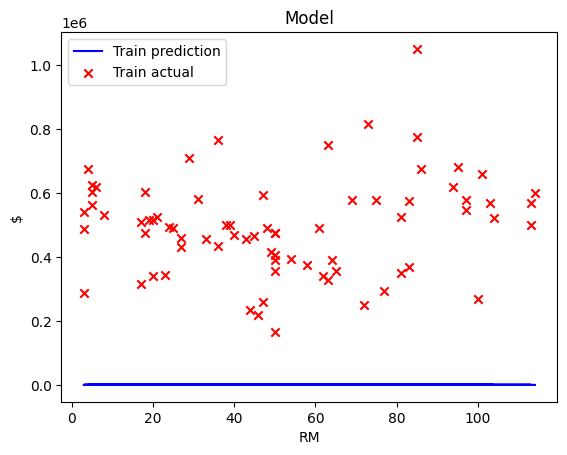

In [96]:
visualize_model_2d(X_train, Y_train, Y_predicted)

In [97]:
def print_model_score(Y_train, Y_predicted):
    """ Printing model score
    """
    r2 = r2_score(Y_train, Y_predicted)
    rmse = (np.sqrt(mean_squared_error(Y_train, Y_predicted)))    
    print('R2 score: {}'.format(r2))    
    print('RMSE: {}'.format(rmse))

In [98]:
print_model_score (Y_train, Y_predicted)

R2 score: -10.60712681308312
RMSE: 517791.9969172817


# Linearní modelu pomocí scikit-learn
- Vytvořte si ručně model lineární regrese bez pomoci externích knihoven
- Vypište jeho parametry
- Vypiše jeho skóre pro trénovací a validační data
- Vykreslete graf historie učení
- Vizualizujte model

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
def get_cost(Y, Y_predicted):
    """ Return MSE for real and predicted ouput data
    """
    Y_resd = Y - Y_predicted
    return np.sum(np.dot(Y_resd.T,Y_resd))/(len(Y-Y_resd)*2)

In [101]:
def print_cost (Y_train, Y_predicted):
    print (f"Cost function MSE: {get_cost(Y_train, Y_predicted)}")

In [102]:
print_cost(Y_train, Y_predicted)

Cost function MSE: 134054276035.79312


In [103]:
def print_model_score(Y_train, Y_predicted):
    """ Printing model score
    """
    r2 = r2_score(Y_train, Y_predicted)
    rmse = (np.sqrt(mean_squared_error(Y_train, Y_predicted)))    
    print('R2 score: {}'.format(r2))    
    print('RMSE: {}'.format(rmse))

In [104]:
print_model_score (Y_train, Y_predicted)

R2 score: -10.60712681308312
RMSE: 517791.9969172817


In [105]:
def update_weights(X, Y, Y_predicted, bias_0, weights_0, learning_rate):
    """ The function adjusts the model parameters bias and weights

        X - input values
        Y - correct output values
        Y_predicted - predicted values
        bias_0 - current value of bias
        weights_0 - current values of weights
        learning_rate - learning rate alpha

    """

    # výpočet parciálních derivací
    delta_bias = (np.sum(Y_predicted - Y))/len(Y)
    delta_weights = (np.dot((Y_predicted - Y),X))/len(Y)

    # výpočet úpravy parametrů modelu
    bias_1 = bias_0 - learning_rate * delta_bias
    weights_1 = weights_0 - learning_rate * delta_weights
    return bias_1, weights_1

In [106]:
Y_predicted = predict(X_train, bias, weights)
bias, weights = update_weights(X_train, Y_train, Y_predicted, bias, weights, 0.01)
print_model_params(bias, weights)

Model parameters
Bias: 4950.47444713798
Weights: [259504.75601721]


In [107]:
Y_predicted = predict(X_train, bias, weights)
print_cost(Y_train, Y_predicted)

Cost function MSE: 115060641043691.05


In [108]:
print_model_score (Y_train, Y_predicted)

R2 score: -9961.557639207027
RMSE: 15169748.91312912


In [109]:
def run_gradient_descent(X, Y, learning_rate, num_iterations):
    """ Algoritmus gradient descent 
        X - input data
        Y - output data
        learning_rate - learning rate alpha
        num_iteration - number of iteration    

        gd_iterations_df - history of learning
        bias             - bias parameter
        weights          - weights parameter
    """
    # inicializace parametrů modelu
    bias, weights=initialize(X.shape[1])
    iter_num=0

    # ukladání postupu učení do dataFrame
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    
    for each_iter in range(num_iterations):
        # kontrolní zobrazení skóre
        Y_predicted = predict(X, bias, weights)
        this_cost=get_cost(Y, Y_predicted)

        # vylepšení parametrů
        prev_bias=bias
        prev_weights=weights
        bias, weights = update_weights(X, Y, Y_predicted, prev_bias, prev_weights, learning_rate)

        # uložení každé 10. iterace do historie učen
        if(iter_num % 10==0):
            gd_iterations_df.loc[result_idx]=[iter_num, this_cost]
            result_idx=result_idx+1

        iter_num +=1    
    return gd_iterations_df, bias, weights

In [110]:
gd_iterations_df, bias, weights=run_gradient_descent(X_train, Y_train, learning_rate=0.001, num_iterations=200)

In [111]:
# Vypsání modelu
print_model_params(bias, weights)
Y_predicted=predict(X_train, bias, weights)
print_cost(Y_train, Y_predicted)
print_model_score (Y_train, Y_predicted)

Model parameters
Bias: -2.5335533916846127e+85
Weights: [-1.78686405e+87]
Cost function MSE: 5.7675582828281925e+177
R2 score: -4.993856396849301e+167
RMSE: 1.07401659976261e+89


In [112]:
Y_val_predicted = predict(X_val, bias, weights)
print_cost(Y_val, Y_val_predicted)
print_model_score(Y_val, Y_val_predicted)

Cost function MSE: 4.391983227045423e+177
R2 score: -4.713855774567979e+167
RMSE: 9.37228171476447e+88


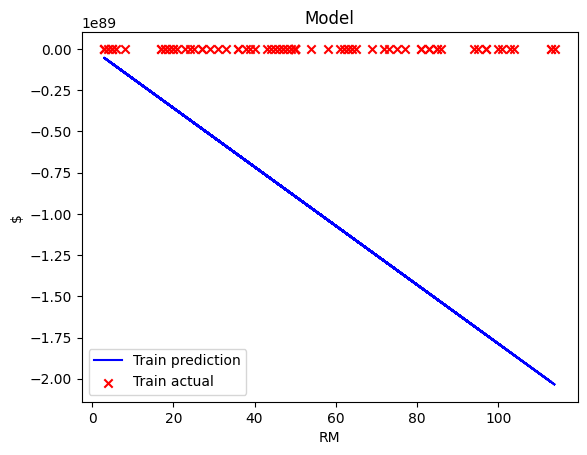

In [113]:
visualize_model_2d(X_train, Y_train, Y_predicted)

Text(0, 0.5, 'Cost or MSE')

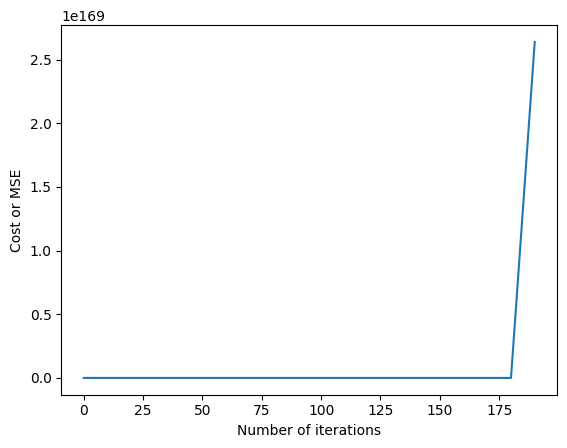

In [114]:
# zobrazení, jak s počtem iterací klesá hodnota nákladové funkce
plt.plot(gd_iterations_df['iteration'], gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

In [115]:
# porovnání vlivu velikosti learning rate na rychlost učeni
alpha_df_1, bias_1, weights_1=run_gradient_descent(X_train, Y_train, learning_rate=0.01, num_iterations=200)
alpha_df_2, bias_2, weights_2=run_gradient_descent(X_train, Y_train, learning_rate=0.001, num_iterations=200)

/var/folders/7v/b2fgzwzn4xs_ycg9n9hbk3540000gn/T/ipykernel_24210/3688134843.py:19: RuntimeWarning: invalid value encountered in subtract
  weights_1 = weights_0 - learning_rate * delta_weights


Model parameters
Bias: -inf
Weights: [nan]
Cost function MSE: nan


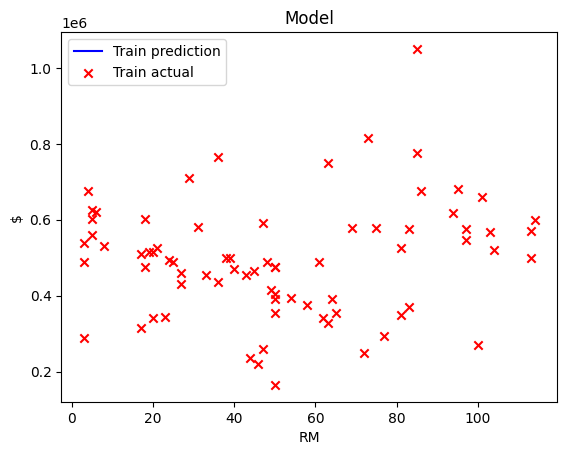

In [116]:
print_model_params(bias_1, weights_1)
Y_predicted_1 = predict(X_train, bias_1, weights_1)
print_cost(Y_train, Y_predicted_1)
visualize_model_2d(X_train, Y_train, Y_predicted_1)

Model parameters
Bias: -2.533615409367034e+85
Weights: [-1.78690779e+87]
Cost function MSE: 5.767840649070777e+177


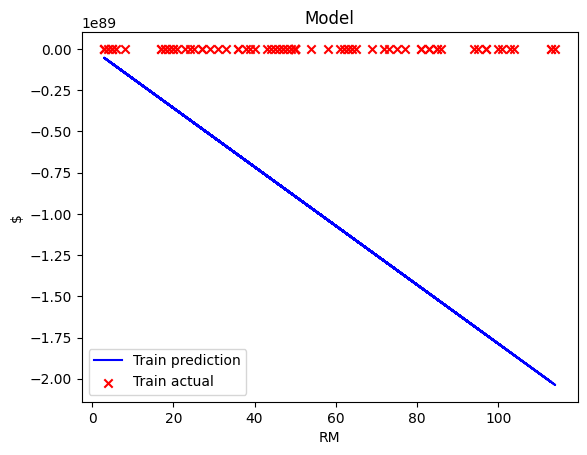

In [117]:
print_model_params(bias_2, weights_2)
Y_predicted_2 = predict(X_train, bias_2, weights_2)
print_cost(Y_train, Y_predicted_2)
visualize_model_2d(X_train, Y_train, Y_predicted_2)

Text(0.5, 1.0, 'Cost vs. Iterations for different alpha values')

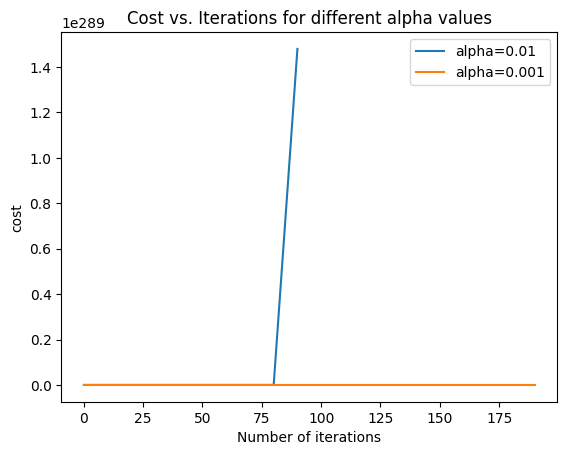

In [118]:
# rychlost vytrénování modelu pro různa learning rate alpha
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost vs. Iterations for different alpha values')

In [76]:
x_label, y_label, z_label = "Living Area (m²)", "Bedrooms", "Price"
X1 = X_train[:, 0]  # 1. sloupec
X2 = X_train[:, 1]  # 2. sloupec
Y = Y_train  # Cílová proměnná
    
# Vytvoření 3D scatter plotu
fig = go.Figure()

# Scatter plot - body dat
fig.add_trace(go.Scatter3d(
        x=X1, y=X2, z=Y,
        mode='markers',
        marker=dict(size=5, color=Y, colorscale='Viridis', opacity=0.8),
        name="Data"
))
fig.show()

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
lin_model = LinearRegression()

In [77]:
lin_model.fit(X_train, Y_train)

NameError: name 'lin_model' is not defined

In [78]:
print ("Bias: ", lin_model.intercept_)
print("Weights: ", lin_model.coef_)

NameError: name 'lin_model' is not defined

In [79]:
Y_predicted = lin_model.predict(X_train)

NameError: name 'lin_model' is not defined

In [80]:
print_model_score(Y_train, Y_predicted)

R2 score: -3.213059672174981e+181
RMSE: 9.201121557738995e+95


In [104]:
def visualize_model_3D(X1, X2, Y, bias, weights, points=50):      
    # Popisky os
    x_label, y_label, z_label = "Living Area (m²)", "Bedrooms", "Price"
    
    # Vytvoření 3D scatter plotu
    fig = go.Figure()

    # Scatter plot - body dat
    fig.add_trace(go.Scatter3d(
        x=X1, y=X2, z=Y,
        mode='markers',
        marker=dict(size=5, color=Y, colorscale='Viridis', opacity=0.8),
        name="Data"
    ))

    # Modelová plocha
    x_range = np.linspace(min(X1), max(X1), points)
    y_range = np.linspace(min(X2), max(X2), points)
    xs, ys = np.meshgrid(x_range, y_range)
    zs = xs * weights[0] + ys * weights[1] + bias  # Modelová predikce

    fig.add_trace(go.Surface(
        x=xs, y=ys, z=zs,
        colorscale="Blues",
        opacity=0.5,
        name="Model Surface"
    ))

    # Aktualizace layoutu
    fig.update_layout(
        title="3D Model Visualization",
        scene=dict(
            xaxis_title=x_label,
            yaxis_title=y_label,
            zaxis_title=z_label
        )
    )

    # Zobrazení grafu
    fig.show()

In [105]:
visualize_model_3D(X1, X2, Y_train, lin_model.intercept_, lin_model.coef_, 40)

NameError: name 'X1' is not defined

In [ ]:
Y_val_predict = lin_model.predict(X_val)

In [ ]:
print_model_score(Y_val, Y_val_predict)

In [ ]:
import pickle
filename = 'regression_linear_model.sav'
pickle.dump(lin_model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))